<a href="https://colab.research.google.com/github/MJanbandhu/Prompt_Engineering/blob/main/git_commit_history.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyGithub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [ ]:
from github import Github
import pandas as pd

# Replace with your personal access token
access_token = "YOUR_ACCESS_TOKEN"

# Replace with the repository you want to analyze (e.g., "owner/repo")
repo_name = "https://github.com/langchain-ai/langchain"

# Initialize the Github object
g = Github(access_token)

# Get the repository
repo = g.get_repo(repo_name)

# Get the commits
commits = repo.get_commits()

# Prepare a list to hold commit data
commit_data = []

# Loop through the commits and collect data
for commit in commits:
    commit_info = {
        "sha": commit.sha,
        "author": commit.commit.author.name,
        "author_date": commit.commit.author.date,
        "committer": commit.commit.committer.name,
        "committer_date": commit.commit.committer.date,
        "message": commit.commit.message,
    }
    commit_data.append(commit_info)

# Create a DataFrame
df = pd.DataFrame(commit_data)

# Save the commit data to a CSV file
df.to_csv("commit_history.csv", index=False)

# Display the DataFrame
print(df)


UnknownObjectException: 404 {"message": "Not Found", "documentation_url": "https://docs.github.com/rest", "status": "404"}

In [ ]:
from github import Github
import pandas as pd

# Replace with your personal access token
access_token = "YOUR_ACCESS_TOKEN"

# Public repository to analyze
repo_name = "langchain-ai/langchain"

# Initialize the Github object
g = Github(access_token)

try:
    # Print user information to confirm token validity
    user = g.get_user()
    print(f"Authenticated as: {user.login}")

    # Get the repository
    repo = g.get_repo(repo_name)
    print(f"Successfully accessed repository: {repo.full_name}")

    # Get the commits
    commits = repo.get_commits()
    print(f"Total commits fetched: {commits.totalCount}")

    # Prepare a list to hold commit data
    commit_data = []

    # Loop through the commits and collect data
    for commit in commits:
        commit_info = {
            "sha": commit.sha,
            "author": commit.commit.author.name if commit.commit.author else 'Unknown',
            "author_date": commit.commit.author.date if commit.commit.author else 'Unknown',
            "committer": commit.commit.committer.name if commit.commit.committer else 'Unknown',
            "committer_date": commit.commit.committer.date if commit.commit.committer else 'Unknown',
            "message": commit.commit.message,
        }
        commit_data.append(commit_info)

    # Create a DataFrame
    df = pd.DataFrame(commit_data)

    # Save the commit data to a CSV file
    df.to_csv("commit_history.csv", index=False)

    # Display the DataFrame
    print(df)

except Exception as e:
    print(f"Error: {e}")


Authenticated as: getkksingh1
Successfully accessed repository: langchain-ai/langchain
Total commits fetched: 10078
                                            sha           author  \
0      47f69fe0d85056a378d7de7e7210247f5b9a8704        Jacob Lee   
1      672fcbb8dc82b89ea40c014d1ee434495603d0a9        Jacob Lee   
2      13254715a20d72dedbb6d4fc91b5fe621b8399f1        Jacob Lee   
3      2c9b84c3a86be671e083acff4db9df79f6bc7ff4  Leonid Ganeline   
4      79d8556c22956d4ce6776e5b9690e216e4fbb738        Jacob Lee   
...                                         ...              ...   
10073  21b10ffb130aeac3131899e551939338b0dcebef   Harrison Chase   
10074  1bc8def8489c66ab2e4158a55e05dbdcb01d3bf7   Harrison Chase   
10075  5621ca7b074c194d0f4e57c5664e223fa4b5e09b   Harrison Chase   
10076  1ef3ab4d0e663be147a5bcf542045e1f4a065778   Harrison Chase   
10077  18aeb720126a68201c7e3b5a617139c27c779496   Harrison Chase   

                    author_date       committer            committe

In [ ]:
    # Analyze commits by author
    author_commit_counts = df['author'].value_counts().reset_index()
    author_commit_counts.columns = ['author', 'commit_count']
    author_commit_counts = author_commit_counts.sort_values(by='commit_count', ascending=False)

    # Display the sorted commit counts by author
    print(author_commit_counts)

    # Save the analysis to a CSV file
    author_commit_counts.to_csv("author_commit_counts.csv", index=False)

               author  commit_count
0      Harrison Chase          1230
1             Bagatur          1050
2         Erick Friis           563
3      Eugene Yurtsev           446
4         Nuno Campos           322
...               ...           ...
1357     Ingo Kleiber             1
1356             鹿鹿鹿鲨             1
1355     Justin Torre             1
1354  Satoru Sakamoto             1
2532          Michael             1

[2533 rows x 2 columns]


<ipython-input-6-331b8bb1a10b>:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['author_date'].dt.to_period('M')


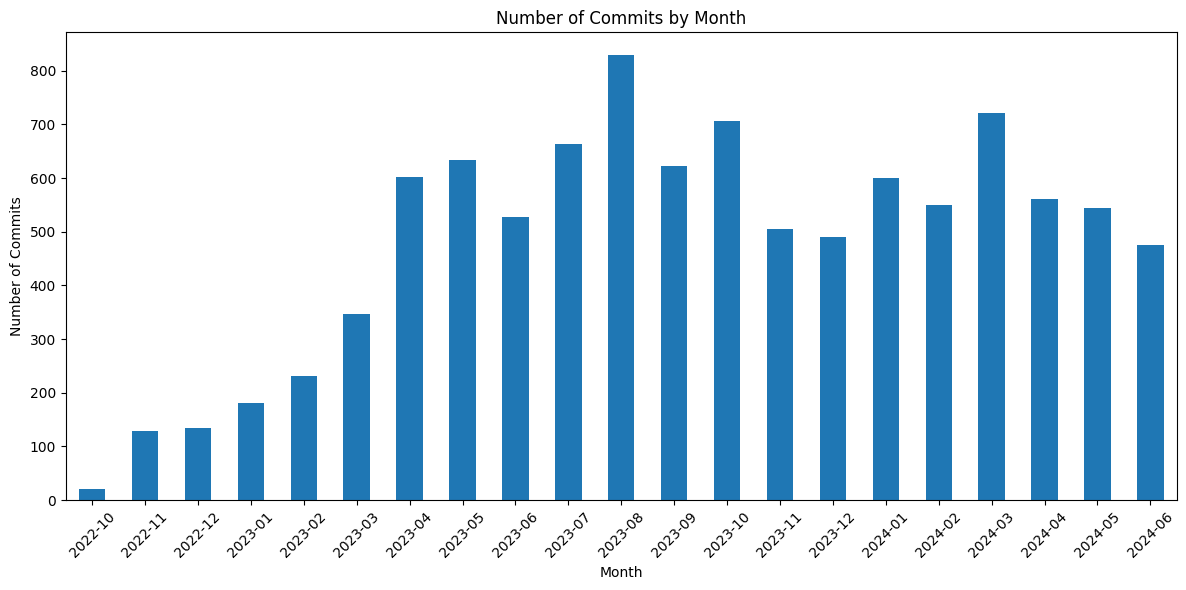

In [ ]:
import matplotlib.pyplot as plt

# Convert author_date to datetime
df['author_date'] = pd.to_datetime(df['author_date'])

# Extract year and month from author_date
df['year_month'] = df['author_date'].dt.to_period('M')

# Group by year_month and count commits
monthly_commits = df['year_month'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
monthly_commits.plot(kind='bar')
plt.title('Number of Commits by Month')
plt.xlabel('Month')
plt.ylabel('Number of Commits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-7-922b9f8458fc>:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['author_date'].dt.to_period('M')
<ipython-input-7-922b9f8458fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=monthly_commits.index.astype(str), y=monthly_commits.values, palette="viridis")


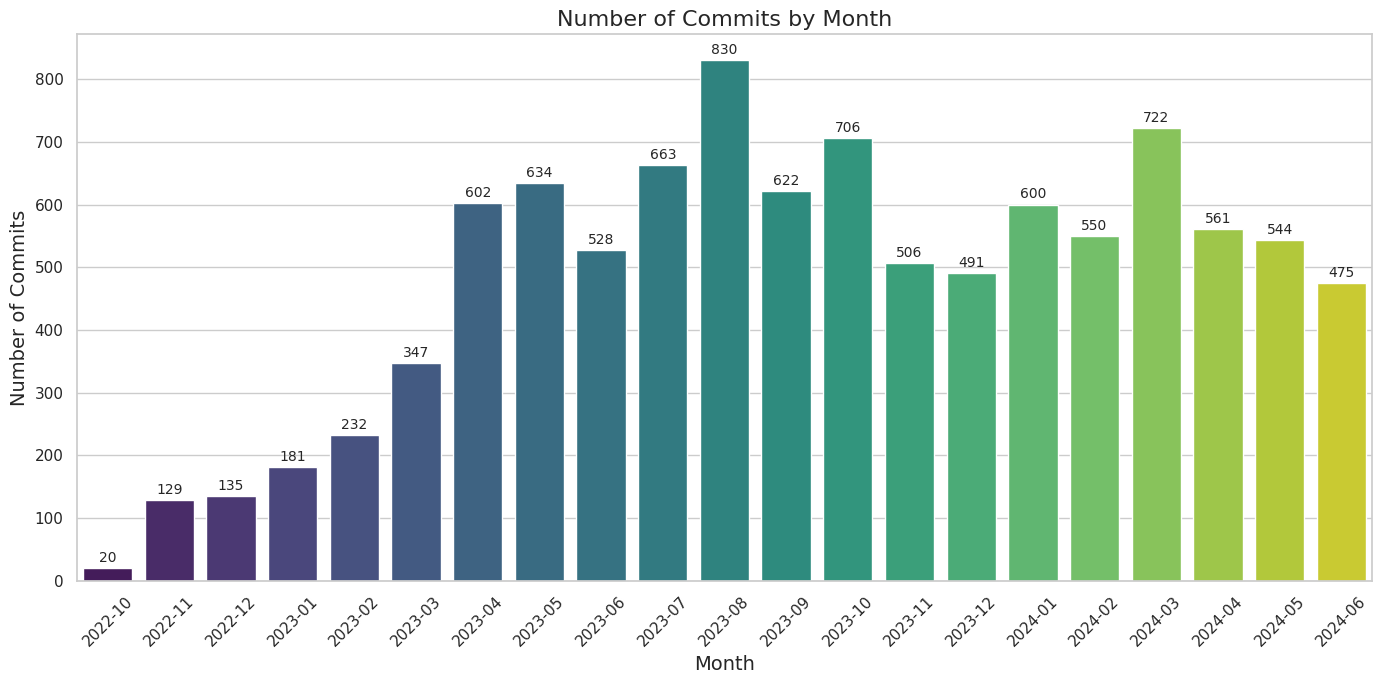

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn style for better aesthetics
sns.set(style="whitegrid")

# Convert author_date to datetime
df['author_date'] = pd.to_datetime(df['author_date'])

# Extract year and month from author_date
df['year_month'] = df['author_date'].dt.to_period('M')

# Group by year_month and count commits
monthly_commits = df['year_month'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(14, 7))
barplot = sns.barplot(x=monthly_commits.index.astype(str), y=monthly_commits.values, palette="viridis")

# Add titles and labels
plt.title('Number of Commits by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Commits', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add values on top of the bars
for i in range(len(monthly_commits)):
    barplot.text(i, monthly_commits.values[i] + 5, monthly_commits.values[i], ha='center', va='bottom', fontsize=10)

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the plot
plt.show()
